# 1. Data Understanding

### A. Data Description

In [86]:
#Load Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
pd.set_option("display.max_column", None)
warnings.filterwarnings("ignore")

In [87]:
#Load Dataset
df_train       = pd.read_csv('train.csv')
df_backtesting = pd.read_csv('test.csv')

In [88]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [89]:
df_train.shape

(1460, 81)

In [90]:
df_backtesting.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [91]:
Id = df_backtesting['Id']

In [92]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [93]:
df_train.shape

(1460, 81)

In [94]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [95]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### B. EDA (Exploratory Data Analysis)

In [96]:
df_train_eda = df_train.copy(deep=True)

In [97]:
from scipy import stats
from scipy.stats import norm, skew


 mu = 180921.20 and sigma = 79415.29



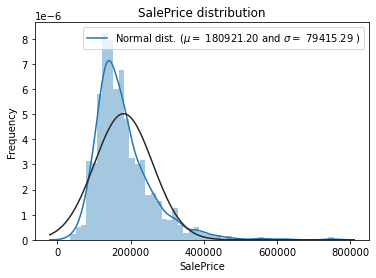

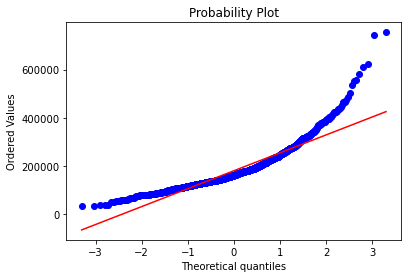

In [98]:
#See the distribution of "SalePrice"
sns.distplot(df_train['SalePrice'] , fit=norm);

(mu, sigma) = norm.fit(df_train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)
plt.show()


 mu = 12.02 and sigma = 0.40



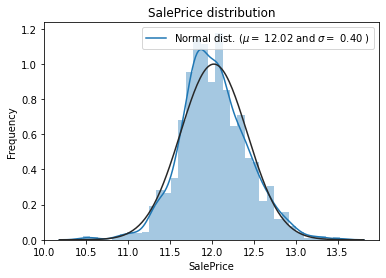

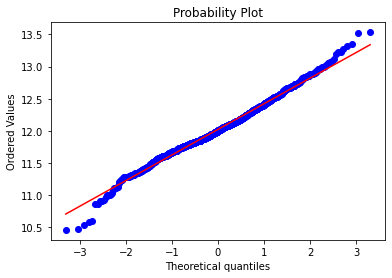

In [99]:
#As we can see above, the data distribution of "Sales Price" is not normal, which is skewed to the right, 
#so I will normalize the distribution.
df_train["SalePrice"] = np.log1p(df_train["SalePrice"])

#Check the new distribution 
sns.distplot(df_train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df_train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)
plt.show()


# 3. Data Preparation

### A. Data Cleaning

In [100]:
df_train2 = df_train.copy(deep=True)
df_backtesting2 = df_backtesting.copy(deep=True)

In [101]:
df_train2_num = df_train.select_dtypes(include = 'number')
df_train2_obj = df_train.select_dtypes(include = 'object')
df_backtesting2_num = df_backtesting2.select_dtypes(include = 'number')
df_backtesting2_obj = df_backtesting2.select_dtypes(include = 'object')

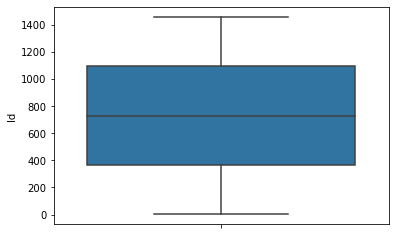

count    1460.000000
mean      730.500000
std       421.610009
min         1.000000
25%       365.750000
50%       730.500000
75%      1095.250000
max      1460.000000
Name: Id, dtype: float64
upperlimit: 1460
lowerlimit: 1
outlier: count: 0 proportion: 0.0 list: []


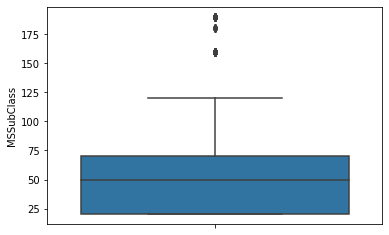

count    1460.000000
mean       56.897260
std        42.300571
min        20.000000
25%        20.000000
50%        50.000000
75%        70.000000
max       190.000000
Name: MSSubClass, dtype: float64
upperlimit: 120
lowerlimit: 20
outlier: count: 103 proportion: 0.07054794520547945 list: [190, 190, 160, 180, 160, 190, 160, 190, 160, 190, 160, 160, 160, 160, 160, 160, 160, 160, 160, 190, 160, 190, 190, 190, 190, 160, 160, 160, 190, 160, 160, 180, 180, 190, 180, 160, 160, 160, 190, 190, 160, 160, 160, 180, 160, 190, 190, 180, 160, 160, 160, 160, 190, 190, 190, 160, 160, 160, 160, 160, 190, 160, 160, 160, 160, 160, 190, 160, 160, 190, 160, 160, 190, 160, 180, 190, 160, 160, 160, 160, 160, 190, 160, 160, 190, 190, 160, 160, 160, 160, 190, 160, 180, 160, 160, 160, 160, 160, 160, 190, 190, 180, 180]


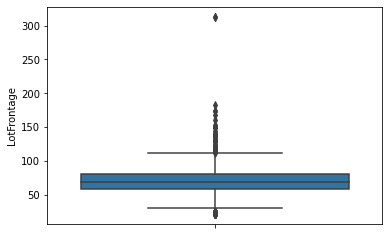

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64
upperlimit: nan
lowerlimit: nan
outlier: count: 0 proportion: 0.0 list: []


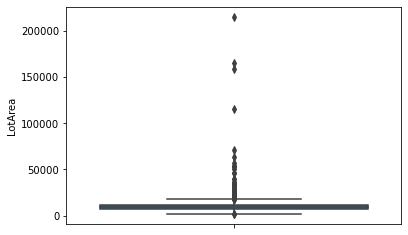

count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64
upperlimit: 17671
lowerlimit: 1491
outlier: count: 69 proportion: 0.04726027397260274 list: [50271, 19900, 21000, 21453, 19378, 31770, 22950, 25419, 159000, 19296, 39104, 19138, 18386, 215245, 164660, 20431, 18800, 53107, 34650, 22420, 21750, 70761, 53227, 40094, 32668, 21872, 21780, 25095, 46589, 20896, 18450, 21535, 26178, 115149, 21695, 53504, 21384, 28698, 45600, 17920, 25286, 27650, 24090, 25000, 1300, 21286, 1477, 21750, 29959, 18000, 23257, 17755, 35760, 18030, 35133, 32463, 18890, 24682, 23595, 17871, 36500, 63887, 20781, 25339, 57200, 20544, 19690, 21930, 26142]


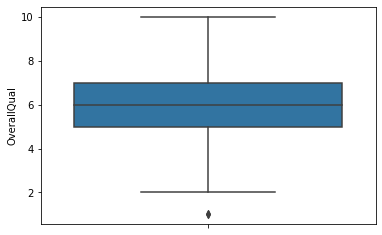

count    1460.000000
mean        6.099315
std         1.382997
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: OverallQual, dtype: float64
upperlimit: 10
lowerlimit: 2
outlier: count: 2 proportion: 0.0013698630136986301 list: [1, 1]


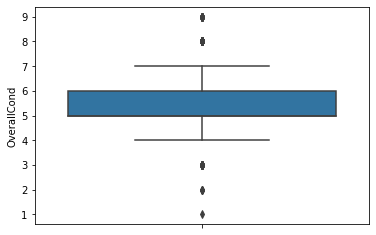

count    1460.000000
mean        5.575342
std         1.112799
min         1.000000
25%         5.000000
50%         5.000000
75%         6.000000
max         9.000000
Name: OverallCond, dtype: float64
upperlimit: 7
lowerlimit: 4
outlier: count: 125 proportion: 0.08561643835616438 list: [8, 8, 8, 2, 3, 8, 8, 8, 8, 9, 8, 9, 9, 3, 9, 8, 2, 8, 8, 9, 8, 3, 8, 8, 8, 1, 2, 3, 3, 8, 2, 8, 3, 8, 8, 8, 8, 9, 8, 8, 8, 8, 9, 9, 3, 8, 3, 8, 9, 8, 8, 8, 3, 3, 3, 2, 8, 8, 9, 8, 8, 9, 8, 9, 3, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 3, 8, 3, 8, 8, 8, 9, 8, 9, 8, 3, 8, 3, 8, 3, 3, 8, 3, 8, 8, 3, 9, 3, 8, 3, 9, 8, 8, 8, 8, 8, 8, 8, 9, 3, 8, 8, 8, 8, 9, 8, 3, 9, 9, 3, 8, 8, 8, 9, 9]


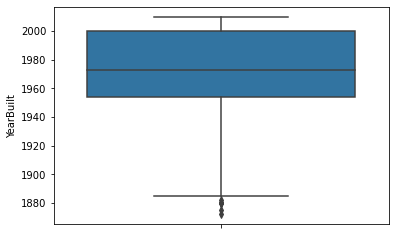

count    1460.000000
mean     1971.267808
std        30.202904
min      1872.000000
25%      1954.000000
50%      1973.000000
75%      2000.000000
max      2010.000000
Name: YearBuilt, dtype: float64
upperlimit: 2010
lowerlimit: 1885
outlier: count: 7 proportion: 0.004794520547945206 list: [1880, 1880, 1880, 1882, 1880, 1875, 1872]


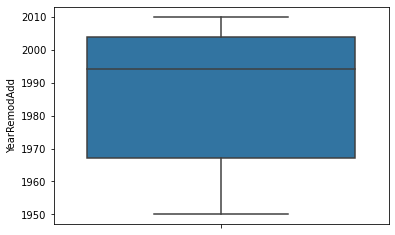

count    1460.000000
mean     1984.865753
std        20.645407
min      1950.000000
25%      1967.000000
50%      1994.000000
75%      2004.000000
max      2010.000000
Name: YearRemodAdd, dtype: float64
upperlimit: 2010
lowerlimit: 1950
outlier: count: 0 proportion: 0.0 list: []


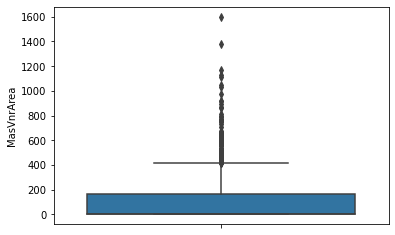

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64
upperlimit: nan
lowerlimit: nan
outlier: count: 0 proportion: 0.0 list: []


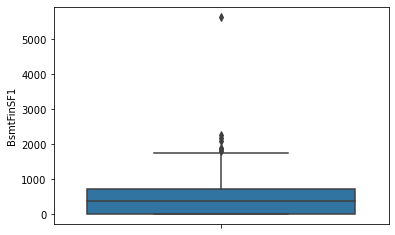

count    1460.000000
mean      443.639726
std       456.098091
min         0.000000
25%         0.000000
50%       383.500000
75%       712.250000
max      5644.000000
Name: BsmtFinSF1, dtype: float64
upperlimit: 1767
lowerlimit: 0
outlier: count: 7 proportion: 0.004794520547945206 list: [1810, 1880, 1904, 2260, 2188, 2096, 5644]


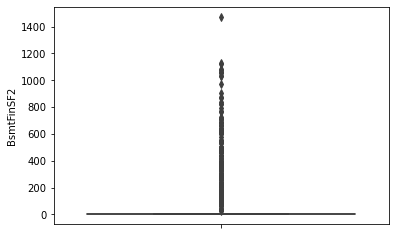

count    1460.000000
mean       46.549315
std       161.319273
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1474.000000
Name: BsmtFinSF2, dtype: float64
upperlimit: 0
lowerlimit: 0
outlier: count: 167 proportion: 0.11438356164383562 list: [32, 668, 486, 93, 491, 506, 712, 362, 41, 169, 869, 150, 670, 28, 1080, 181, 768, 215, 374, 208, 441, 184, 279, 306, 180, 712, 580, 690, 692, 228, 125, 1063, 620, 175, 820, 1474, 264, 479, 147, 232, 380, 544, 294, 258, 121, 180, 391, 531, 344, 539, 713, 210, 311, 1120, 165, 532, 279, 96, 495, 180, 174, 1127, 139, 202, 645, 123, 551, 219, 606, 147, 612, 480, 182, 132, 336, 468, 287, 35, 499, 180, 180, 723, 119, 182, 40, 551, 117, 239, 80, 472, 64, 1057, 127, 630, 480, 128, 377, 764, 345, 539, 1085, 435, 823, 500, 290, 324, 634, 411, 841, 1061, 93, 466, 396, 354, 294, 149, 193, 117, 273, 465, 400, 468, 41, 682, 64, 557, 230, 106, 791, 240, 287, 547, 391, 469, 177, 108, 374, 600, 492, 211, 168, 96, 1031, 4

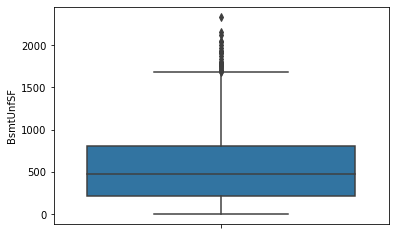

count    1460.000000
mean      567.240411
std       441.866955
min         0.000000
25%       223.000000
50%       477.500000
75%       808.000000
max      2336.000000
Name: BsmtUnfSF, dtype: float64
upperlimit: 1680
lowerlimit: 0
outlier: count: 29 proportion: 0.01986301369863014 list: [1777, 1768, 1907, 1686, 2336, 1694, 2121, 1869, 2153, 1969, 1709, 2042, 1774, 2046, 1836, 1935, 1926, 1734, 1800, 1753, 1905, 1800, 1710, 1752, 1694, 1689, 2002, 1753, 1795]


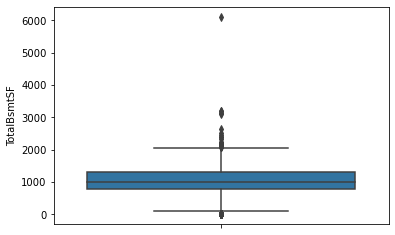

count    1460.000000
mean     1057.429452
std       438.705324
min         0.000000
25%       795.750000
50%       991.500000
75%      1298.250000
max      6110.000000
Name: TotalBsmtSF, dtype: float64
upperlimit: 2046
lowerlimit: 105
outlier: count: 61 proportion: 0.04178082191780822 list: [0, 0, 2223, 0, 0, 0, 2216, 0, 2392, 0, 2121, 2136, 3206, 0, 0, 0, 0, 3094, 2153, 3200, 0, 3138, 0, 0, 0, 0, 2109, 2077, 2444, 0, 0, 0, 0, 2078, 0, 2217, 0, 0, 2330, 0, 0, 0, 0, 2524, 0, 0, 0, 0, 0, 2396, 2158, 0, 0, 2136, 0, 2076, 2110, 6110, 0, 2633, 0]


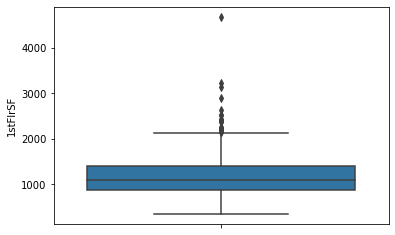

count    1460.000000
mean     1162.626712
std       386.587738
min       334.000000
25%       882.000000
50%      1087.000000
75%      1391.250000
max      4692.000000
Name: 1stFlrSF, dtype: float64
upperlimit: 2136
lowerlimit: 334
outlier: count: 20 proportion: 0.0136986301369863 list: [2207, 2223, 2259, 2158, 2234, 2392, 2402, 3228, 3138, 2515, 2444, 2217, 2364, 2898, 2524, 2411, 2196, 4692, 2156, 2633]


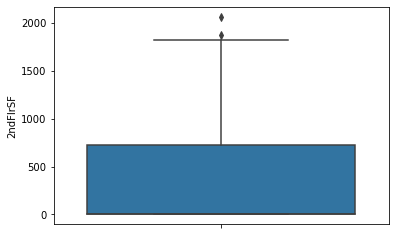

count    1460.000000
mean      346.992466
std       436.528436
min         0.000000
25%         0.000000
50%         0.000000
75%       728.000000
max      2065.000000
Name: 2ndFlrSF, dtype: float64
upperlimit: 1818
lowerlimit: 0
outlier: count: 2 proportion: 0.0013698630136986301 list: [1872, 2065]


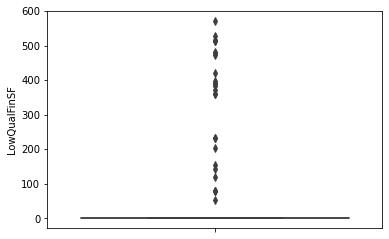

count    1460.000000
mean        5.844521
std        48.623081
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       572.000000
Name: LowQualFinSF, dtype: float64
upperlimit: 0
lowerlimit: 0
outlier: count: 26 proportion: 0.01780821917808219 list: [360, 513, 234, 528, 572, 144, 392, 371, 390, 420, 473, 156, 515, 360, 80, 80, 53, 232, 481, 120, 514, 397, 479, 205, 80, 384]


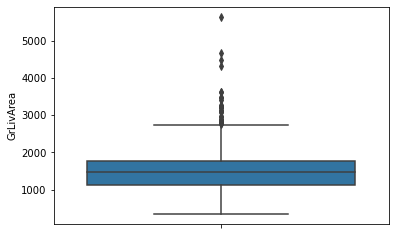

count    1460.000000
mean     1515.463699
std       525.480383
min       334.000000
25%      1129.500000
50%      1464.000000
75%      1776.750000
max      5642.000000
Name: GrLivArea, dtype: float64
upperlimit: 2730
lowerlimit: 334
outlier: count: 31 proportion: 0.021232876712328767 list: [2945, 3222, 3608, 3112, 2794, 3493, 2978, 3228, 4676, 2775, 3194, 3395, 4316, 3279, 3140, 2822, 2872, 2898, 3082, 2868, 2828, 3627, 3086, 2872, 4476, 3447, 5642, 2810, 2792, 3238, 2784]


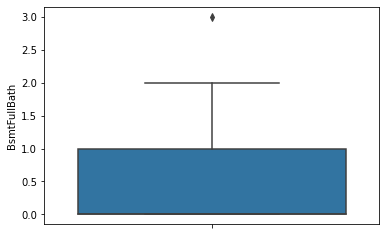

count    1460.000000
mean        0.425342
std         0.518911
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         3.000000
Name: BsmtFullBath, dtype: float64
upperlimit: 2
lowerlimit: 0
outlier: count: 1 proportion: 0.0006849315068493151 list: [3]


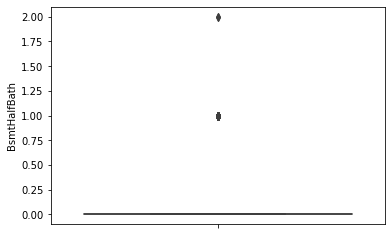

count    1460.000000
mean        0.057534
std         0.238753
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         2.000000
Name: BsmtHalfBath, dtype: float64
upperlimit: 0
lowerlimit: 0
outlier: count: 82 proportion: 0.056164383561643834 list: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


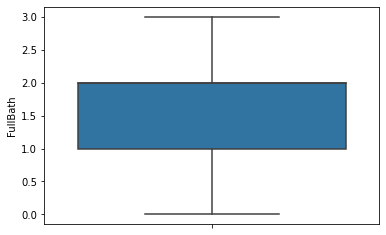

count    1460.000000
mean        1.565068
std         0.550916
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         3.000000
Name: FullBath, dtype: float64
upperlimit: 3
lowerlimit: 0
outlier: count: 0 proportion: 0.0 list: []


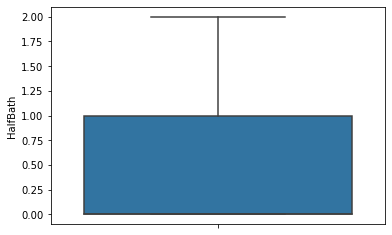

count    1460.000000
mean        0.382877
std         0.502885
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         2.000000
Name: HalfBath, dtype: float64
upperlimit: 2
lowerlimit: 0
outlier: count: 0 proportion: 0.0 list: []


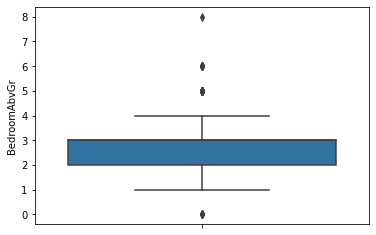

count    1460.000000
mean        2.866438
std         0.815778
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         8.000000
Name: BedroomAbvGr, dtype: float64
upperlimit: 4
lowerlimit: 1
outlier: count: 35 proportion: 0.023972602739726026 list: [0, 5, 5, 6, 0, 5, 6, 5, 5, 6, 5, 6, 5, 0, 8, 5, 6, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 0, 0, 5, 0, 5, 6, 5, 5]


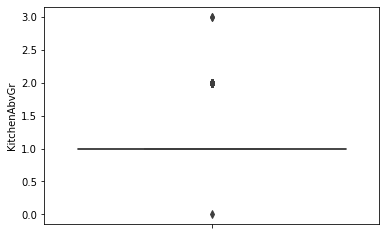

count    1460.000000
mean        1.046575
std         0.220338
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: KitchenAbvGr, dtype: float64
upperlimit: 1
lowerlimit: 1
outlier: count: 68 proportion: 0.04657534246575343 list: [2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


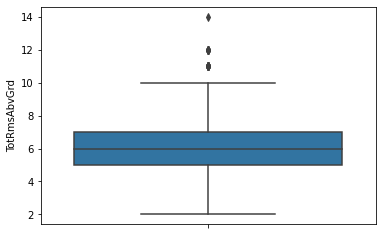

count    1460.000000
mean        6.517808
std         1.625393
min         2.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        14.000000
Name: TotRmsAbvGrd, dtype: float64
upperlimit: 10
lowerlimit: 2
outlier: count: 30 proportion: 0.02054794520547945 list: [11, 11, 12, 11, 11, 11, 11, 14, 11, 12, 11, 12, 11, 11, 12, 11, 12, 11, 12, 11, 11, 12, 12, 11, 11, 12, 12, 12, 11, 11]


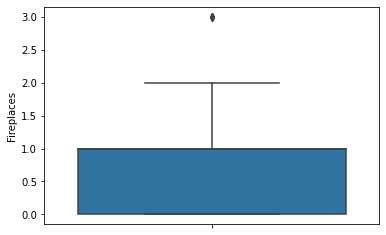

count    1460.000000
mean        0.613014
std         0.644666
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: Fireplaces, dtype: float64
upperlimit: 2
lowerlimit: 0
outlier: count: 5 proportion: 0.003424657534246575 list: [3, 3, 3, 3, 3]


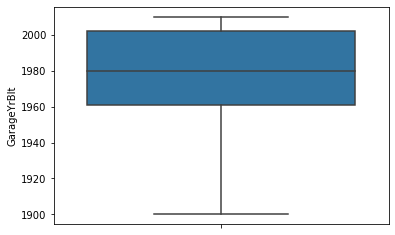

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64
upperlimit: nan
lowerlimit: nan
outlier: count: 0 proportion: 0.0 list: []


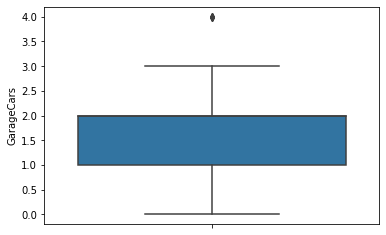

count    1460.000000
mean        1.767123
std         0.747315
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         4.000000
Name: GarageCars, dtype: float64
upperlimit: 3
lowerlimit: 0
outlier: count: 5 proportion: 0.003424657534246575 list: [4, 4, 4, 4, 4]


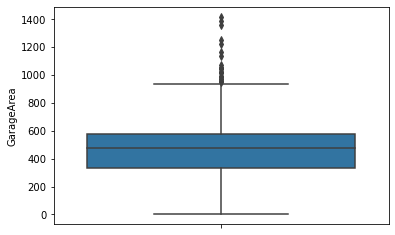

count    1460.000000
mean      472.980137
std       213.804841
min         0.000000
25%       334.500000
50%       480.000000
75%       576.000000
max      1418.000000
Name: GarageArea, dtype: float64
upperlimit: 936
lowerlimit: 0
outlier: count: 21 proportion: 0.014383561643835616 list: [1166, 968, 1053, 1025, 947, 1390, 1134, 983, 1020, 1220, 1248, 1043, 1052, 995, 1356, 1052, 954, 1014, 1418, 968, 1069]


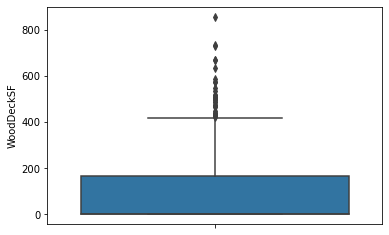

count    1460.000000
mean       94.244521
std       125.338794
min         0.000000
25%         0.000000
50%         0.000000
75%       168.000000
max       857.000000
Name: WoodDeckSF, dtype: float64
upperlimit: 418
lowerlimit: 0
outlier: count: 32 proportion: 0.021917808219178082 list: [857, 576, 476, 574, 441, 468, 670, 495, 536, 519, 466, 517, 426, 503, 486, 486, 511, 421, 550, 509, 474, 728, 436, 431, 448, 439, 635, 500, 668, 586, 431, 736]


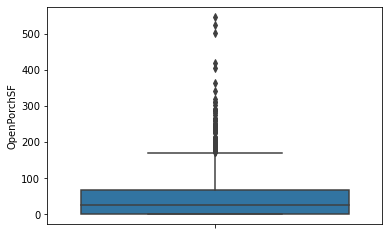

count    1460.000000
mean       46.660274
std        66.256028
min         0.000000
25%         0.000000
50%        25.000000
75%        68.000000
max       547.000000
Name: OpenPorchSF, dtype: float64
upperlimit: 170
lowerlimit: 0
outlier: count: 77 proportion: 0.05273972602739726 list: [204, 213, 258, 199, 234, 184, 205, 228, 238, 260, 198, 172, 208, 228, 184, 250, 175, 195, 214, 231, 192, 187, 176, 523, 285, 406, 182, 502, 274, 172, 243, 235, 312, 267, 265, 288, 341, 204, 174, 247, 291, 312, 418, 240, 364, 188, 207, 234, 192, 191, 252, 189, 282, 224, 319, 244, 185, 200, 180, 263, 304, 234, 240, 192, 229, 211, 198, 287, 292, 207, 241, 547, 211, 184, 262, 210, 236]


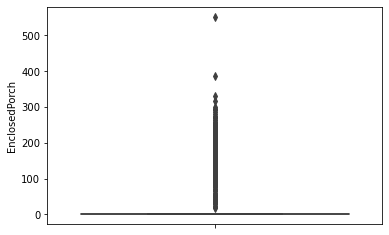

count    1460.000000
mean       21.954110
std        61.119149
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       552.000000
Name: EnclosedPorch, dtype: float64
upperlimit: 0
lowerlimit: 0
outlier: count: 208 proportion: 0.14246575342465753 list: [272, 228, 205, 176, 205, 87, 172, 102, 37, 144, 64, 114, 202, 128, 156, 44, 77, 144, 192, 144, 140, 180, 228, 128, 183, 39, 184, 40, 552, 30, 126, 96, 60, 150, 120, 202, 77, 112, 252, 52, 224, 234, 144, 244, 268, 137, 24, 108, 294, 177, 218, 242, 91, 112, 160, 130, 184, 126, 169, 105, 34, 96, 248, 236, 120, 32, 80, 115, 291, 184, 116, 158, 112, 210, 36, 156, 144, 200, 84, 148, 116, 120, 136, 102, 240, 54, 112, 39, 100, 36, 189, 293, 164, 40, 216, 239, 112, 252, 240, 180, 67, 90, 120, 56, 112, 129, 40, 98, 143, 216, 234, 112, 112, 70, 386, 154, 185, 156, 156, 134, 196, 264, 185, 275, 96, 120, 112, 116, 230, 254, 68, 194, 192, 34, 150, 164, 112, 224, 32, 318, 244, 48, 94, 138, 108, 112, 226, 192, 174, 

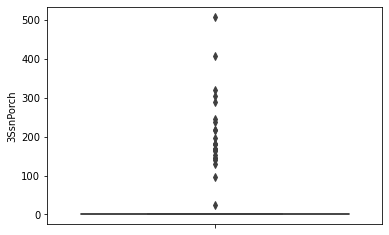

count    1460.000000
mean        3.409589
std        29.317331
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       508.000000
Name: 3SsnPorch, dtype: float64
upperlimit: 0
lowerlimit: 0
outlier: count: 24 proportion: 0.01643835616438356 list: [320, 407, 130, 180, 168, 180, 140, 508, 238, 245, 196, 144, 144, 182, 168, 162, 23, 168, 216, 96, 216, 153, 290, 304]


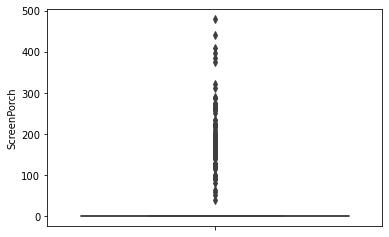

count    1460.000000
mean       15.060959
std        55.757415
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       480.000000
Name: ScreenPorch, dtype: float64
upperlimit: 0
lowerlimit: 0
outlier: count: 116 proportion: 0.07945205479452055 list: [176, 198, 291, 252, 99, 184, 168, 130, 142, 192, 410, 224, 266, 170, 154, 153, 144, 142, 128, 259, 160, 198, 271, 234, 184, 374, 192, 185, 182, 90, 144, 224, 396, 170, 176, 140, 276, 192, 180, 161, 168, 145, 200, 122, 95, 144, 120, 60, 120, 126, 189, 260, 147, 385, 287, 200, 156, 100, 180, 216, 210, 197, 204, 192, 225, 192, 152, 175, 126, 312, 222, 265, 224, 322, 120, 190, 233, 63, 147, 180, 53, 143, 189, 189, 189, 192, 160, 160, 126, 100, 273, 180, 90, 288, 263, 224, 147, 120, 80, 163, 90, 288, 116, 259, 224, 216, 480, 120, 178, 440, 155, 168, 220, 119, 165, 40]


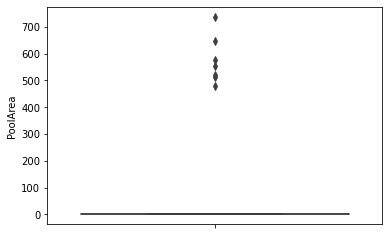

count    1460.000000
mean        2.758904
std        40.177307
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       738.000000
Name: PoolArea, dtype: float64
upperlimit: 0
lowerlimit: 0
outlier: count: 7 proportion: 0.004794520547945206 list: [512, 648, 576, 555, 480, 519, 738]


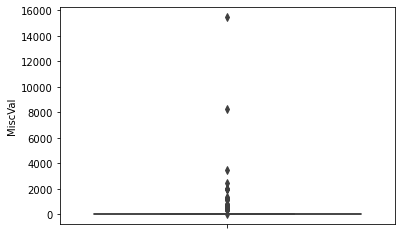

count     1460.000000
mean        43.489041
std        496.123024
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      15500.000000
Name: MiscVal, dtype: float64
upperlimit: 0
lowerlimit: 0
outlier: count: 52 proportion: 0.03561643835616438 list: [700, 350, 700, 500, 400, 700, 480, 400, 400, 450, 450, 500, 450, 700, 400, 15500, 1200, 800, 480, 400, 2000, 2000, 600, 500, 600, 600, 3500, 500, 400, 450, 500, 1300, 1200, 500, 400, 54, 500, 400, 400, 2000, 620, 400, 560, 500, 700, 1400, 400, 8300, 600, 1150, 2000, 2500]


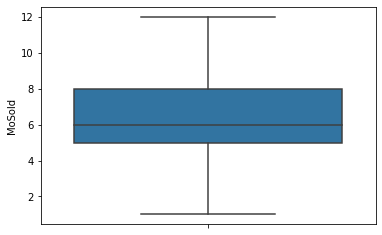

count    1460.000000
mean        6.321918
std         2.703626
min         1.000000
25%         5.000000
50%         6.000000
75%         8.000000
max        12.000000
Name: MoSold, dtype: float64
upperlimit: 12
lowerlimit: 1
outlier: count: 0 proportion: 0.0 list: []


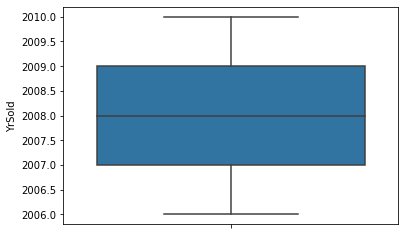

count    1460.000000
mean     2007.815753
std         1.328095
min      2006.000000
25%      2007.000000
50%      2008.000000
75%      2009.000000
max      2010.000000
Name: YrSold, dtype: float64
upperlimit: 2010
lowerlimit: 2006
outlier: count: 0 proportion: 0.0 list: []


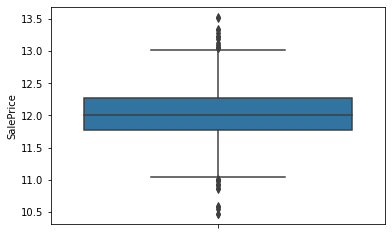

count    1460.000000
mean       12.024057
std         0.399449
min        10.460271
25%        11.775105
50%        12.001512
75%        12.273736
max        13.534474
Name: SalePrice, dtype: float64
upperlimit: 13.02132904585825
lowerlimit: 11.04106411122238
outlier: count: 28 proportion: 0.019178082191780823 list: [10.596659732783579, 13.126032637428713, 13.07107218827772, 11.0186455364637, 11.002116507732017, 13.22672519452875, 10.460270761075149, 10.579005242826247, 11.002116507732017, 13.534474352733596, 10.915106645867503, 10.859018228147887, 13.195615697878253, 13.091906231773164, 13.275829251377, 10.932999821119937, 13.323928581764989, 10.471978128496518, 10.542732775946709, 13.229569788348705, 11.002116507732017, 13.345508528717259, 13.521140839642674, 13.049794835104816, 10.915106645867503, 10.868587496017359, 13.05301544288996, 10.97679912709094]


In [102]:
#Check The Outliers
for x in df_train2_num.columns:
    # boxplot
    sns.boxplot(y=df_train2_num[x])
    plt.show()
   
    
    # statistic metrics
    print(df_train2_num[x].describe())
    q1 = np.percentile(df_train2_num[x], 25)
    q3 = np.percentile(df_train2_num[x], 75)
    iqr = q3-q1
    upperbound = q3+1.5*iqr
    lowerbound = q1-1.5*iqr
    upperlimit = np.max(df_train2_num[x][df_train2_num[x]<=upperbound])
    lowerlimit = np.min(df_train2_num[x][df_train2_num[x]>=lowerbound])
    print('upperlimit: {}'.format(upperlimit))
    print('lowerlimit: {}'.format(lowerlimit))
    outlier = df_train2_num[x][(df_train2_num[x]>upperbound) | (df_train2_num[x]<lowerbound)]
    print('outlier: count: {} proportion: {} list: {}'.format(len(outlier), len(outlier)/len(df_train2_num[x]), list(outlier)))

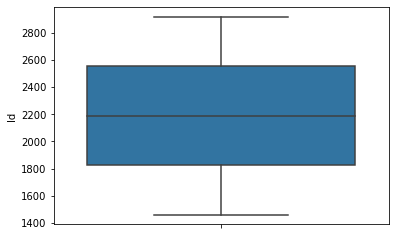

count    1459.000000
mean     2190.000000
std       421.321334
min      1461.000000
25%      1825.500000
50%      2190.000000
75%      2554.500000
max      2919.000000
Name: Id, dtype: float64
upperlimit: 2919
lowerlimit: 1461
outlier: count: 0 proportion: 0.0 list: []


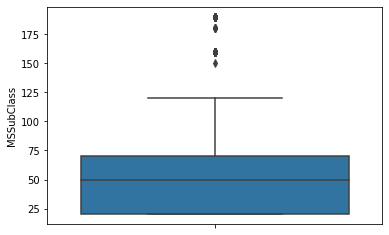

count    1459.000000
mean       57.378341
std        42.746880
min        20.000000
25%        20.000000
50%        50.000000
75%        70.000000
max       190.000000
Name: MSSubClass, dtype: float64
upperlimit: 120
lowerlimit: 20
outlier: count: 104 proportion: 0.07128169979437972 list: [160, 160, 160, 160, 160, 160, 160, 160, 160, 190, 190, 190, 190, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 190, 190, 190, 180, 160, 160, 160, 160, 160, 160, 160, 160, 190, 160, 160, 160, 160, 160, 160, 160, 190, 190, 190, 190, 190, 190, 190, 190, 160, 160, 180, 180, 160, 190, 160, 160, 160, 160, 160, 190, 190, 190, 190, 180, 190, 160, 190, 160, 180, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 190, 190, 190, 190, 190, 190, 150, 180, 160, 190, 190, 160, 180, 160, 160, 160, 160, 160]


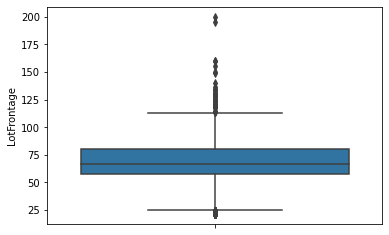

count    1232.000000
mean       68.580357
std        22.376841
min        21.000000
25%        58.000000
50%        67.000000
75%        80.000000
max       200.000000
Name: LotFrontage, dtype: float64
upperlimit: nan
lowerlimit: nan
outlier: count: 0 proportion: 0.0 list: []


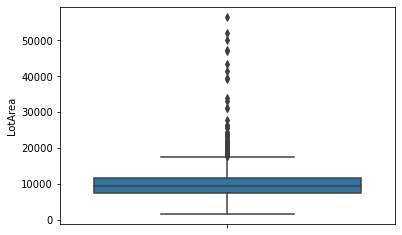

count     1459.000000
mean      9819.161069
std       4955.517327
min       1470.000000
25%       7391.000000
50%       9399.000000
75%      11517.500000
max      56600.000000
Name: LotArea, dtype: float64
upperlimit: 17597
lowerlimit: 1470
outlier: count: 60 proportion: 0.0411240575736806 list: [18494, 18837, 20062, 18600, 19645, 23303, 19255, 26400, 21780, 31220, 47280, 18559, 19508, 24572, 20270, 19550, 47007, 26073, 23730, 18265, 17979, 56600, 18160, 51974, 41600, 19522, 17778, 22002, 21281, 22692, 17808, 23920, 20064, 39290, 25485, 21579, 17871, 20693, 18044, 19958, 43500, 33983, 27697, 39384, 18062, 18261, 21299, 22136, 18275, 33120, 21370, 20355, 19950, 19800, 21533, 21780, 23580, 50102, 31250, 20000]


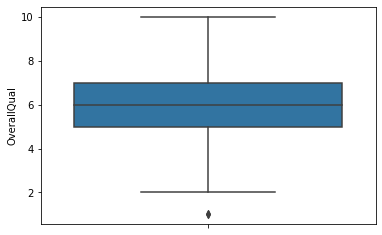

count    1459.000000
mean        6.078821
std         1.436812
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: OverallQual, dtype: float64
upperlimit: 10
lowerlimit: 2
outlier: count: 2 proportion: 0.0013708019191226869 list: [1, 1]


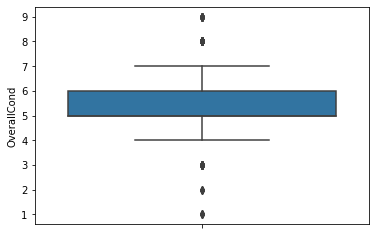

count    1459.000000
mean        5.553804
std         1.113740
min         1.000000
25%         5.000000
50%         5.000000
75%         6.000000
max         9.000000
Name: OverallCond, dtype: float64
upperlimit: 7
lowerlimit: 4
outlier: count: 127 proportion: 0.08704592186429061 list: [8, 8, 2, 9, 9, 3, 8, 8, 3, 1, 3, 3, 8, 8, 2, 2, 8, 8, 8, 9, 8, 8, 8, 8, 9, 9, 8, 8, 8, 8, 3, 3, 8, 1, 9, 3, 2, 8, 8, 9, 8, 8, 2, 8, 3, 9, 8, 3, 8, 9, 1, 8, 9, 1, 9, 8, 8, 8, 3, 8, 8, 8, 3, 8, 8, 8, 8, 9, 3, 9, 8, 8, 9, 1, 3, 8, 9, 8, 9, 3, 8, 8, 8, 9, 8, 8, 8, 8, 3, 9, 1, 8, 3, 8, 8, 8, 3, 8, 8, 8, 9, 8, 3, 3, 8, 8, 8, 3, 8, 8, 8, 8, 8, 8, 3, 8, 3, 8, 8, 8, 8, 3, 3, 8, 8, 8, 3]


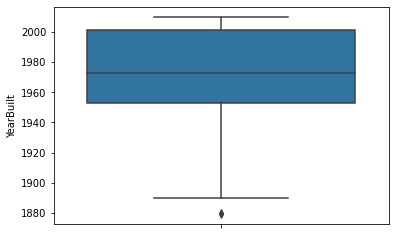

count    1459.000000
mean     1971.357779
std        30.390071
min      1879.000000
25%      1953.000000
50%      1973.000000
75%      2001.000000
max      2010.000000
Name: YearBuilt, dtype: float64
upperlimit: 2010
lowerlimit: 1890
outlier: count: 2 proportion: 0.0013708019191226869 list: [1880, 1879]


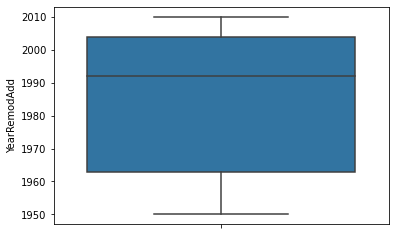

count    1459.000000
mean     1983.662783
std        21.130467
min      1950.000000
25%      1963.000000
50%      1992.000000
75%      2004.000000
max      2010.000000
Name: YearRemodAdd, dtype: float64
upperlimit: 2010
lowerlimit: 1950
outlier: count: 0 proportion: 0.0 list: []


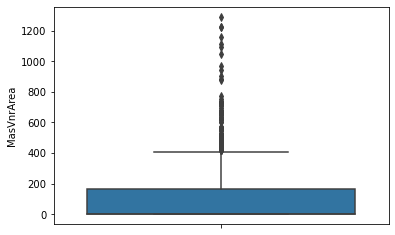

count    1444.000000
mean      100.709141
std       177.625900
min         0.000000
25%         0.000000
50%         0.000000
75%       164.000000
max      1290.000000
Name: MasVnrArea, dtype: float64
upperlimit: nan
lowerlimit: nan
outlier: count: 0 proportion: 0.0 list: []


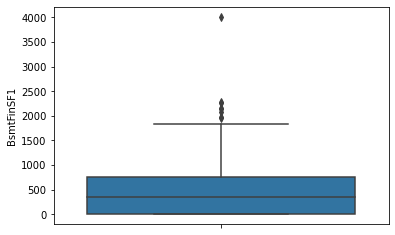

count    1458.000000
mean      439.203704
std       455.268042
min         0.000000
25%         0.000000
50%       350.500000
75%       753.500000
max      4010.000000
Name: BsmtFinSF1, dtype: float64
upperlimit: nan
lowerlimit: nan
outlier: count: 0 proportion: 0.0 list: []


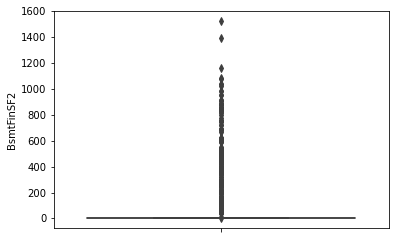

count    1458.000000
mean       52.619342
std       176.753926
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1526.000000
Name: BsmtFinSF2, dtype: float64
upperlimit: nan
lowerlimit: nan
outlier: count: 0 proportion: 0.0 list: []


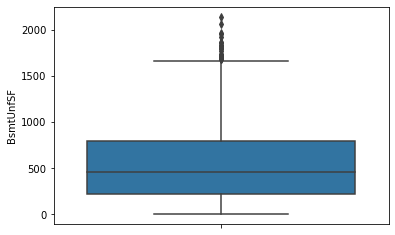

count    1458.000000
mean      554.294925
std       437.260486
min         0.000000
25%       219.250000
50%       460.000000
75%       797.750000
max      2140.000000
Name: BsmtUnfSF, dtype: float64
upperlimit: nan
lowerlimit: nan
outlier: count: 0 proportion: 0.0 list: []


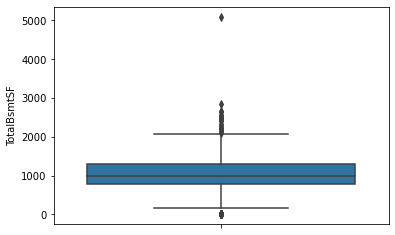

count    1458.000000
mean     1046.117970
std       442.898624
min         0.000000
25%       784.000000
50%       988.000000
75%      1305.000000
max      5095.000000
Name: TotalBsmtSF, dtype: float64
upperlimit: nan
lowerlimit: nan
outlier: count: 0 proportion: 0.0 list: []


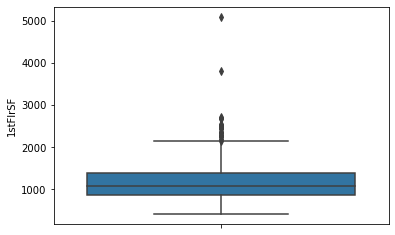

count    1459.000000
mean     1156.534613
std       398.165820
min       407.000000
25%       873.500000
50%      1079.000000
75%      1382.500000
max      5095.000000
Name: 1stFlrSF, dtype: float64
upperlimit: 2140
lowerlimit: 407
outlier: count: 23 proportion: 0.015764222069910898 list: [2696, 2522, 2674, 2452, 2492, 2200, 2490, 2365, 2464, 2470, 2276, 3820, 2338, 2234, 2552, 2290, 2362, 2497, 2422, 5095, 2726, 2279, 2151]


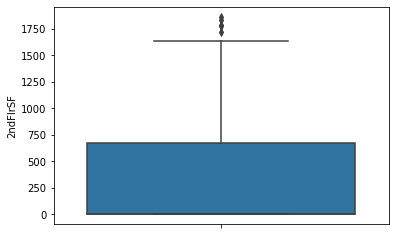

count    1459.000000
mean      325.967786
std       420.610226
min         0.000000
25%         0.000000
50%         0.000000
75%       676.000000
max      1862.000000
Name: 2ndFlrSF, dtype: float64
upperlimit: 1629
lowerlimit: 0
outlier: count: 5 proportion: 0.003427004797806717 list: [1788, 1721, 1778, 1862, 1836]


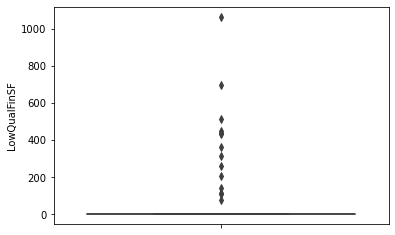

count    1459.000000
mean        3.543523
std        44.043251
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1064.000000
Name: LowQualFinSF, dtype: float64
upperlimit: 0
lowerlimit: 0
outlier: count: 14 proportion: 0.009595613433858808 list: [362, 1064, 431, 436, 259, 312, 108, 697, 512, 114, 205, 80, 140, 450]


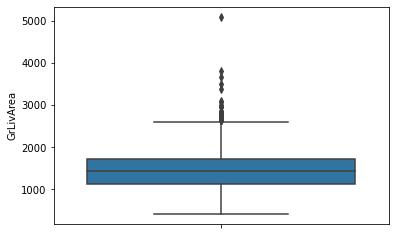

count    1459.000000
mean     1486.045922
std       485.566099
min       407.000000
25%      1117.500000
50%      1432.000000
75%      1721.000000
max      5095.000000
Name: GrLivArea, dtype: float64
upperlimit: 2592
lowerlimit: 407
outlier: count: 44 proportion: 0.03015764222069911 list: [2696, 2650, 2673, 2772, 2690, 2674, 2687, 3005, 2640, 2787, 2787, 2787, 2840, 2748, 2790, 2649, 2690, 2683, 2786, 2944, 2814, 3820, 2656, 2758, 2956, 3078, 3086, 2654, 5095, 2726, 2687, 2798, 3390, 2698, 2795, 2855, 2726, 3500, 2799, 2640, 2646, 2826, 2640, 3672]


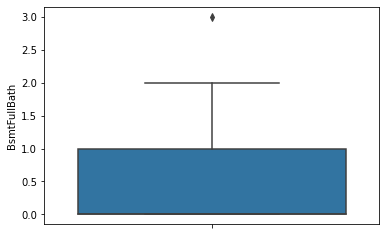

count    1457.000000
mean        0.434454
std         0.530648
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         3.000000
Name: BsmtFullBath, dtype: float64
upperlimit: nan
lowerlimit: nan
outlier: count: 0 proportion: 0.0 list: []


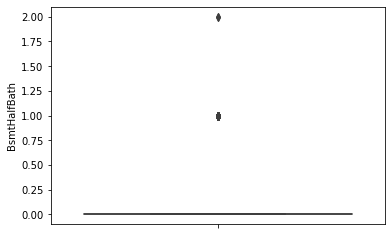

count    1457.000000
mean        0.065202
std         0.252468
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         2.000000
Name: BsmtHalfBath, dtype: float64
upperlimit: nan
lowerlimit: nan
outlier: count: 0 proportion: 0.0 list: []


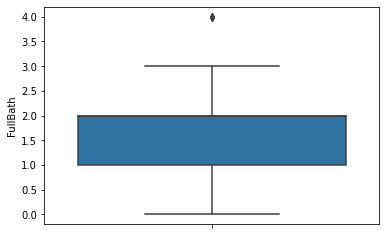

count    1459.000000
mean        1.570939
std         0.555190
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         4.000000
Name: FullBath, dtype: float64
upperlimit: 3
lowerlimit: 0
outlier: count: 4 proportion: 0.0027416038382453737 list: [4, 4, 4, 4]


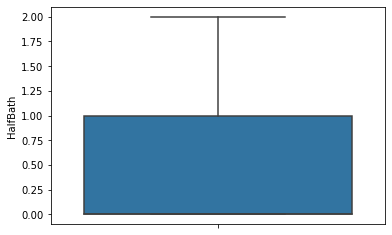

count    1459.000000
mean        0.377656
std         0.503017
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         2.000000
Name: HalfBath, dtype: float64
upperlimit: 2
lowerlimit: 0
outlier: count: 0 proportion: 0.0 list: []


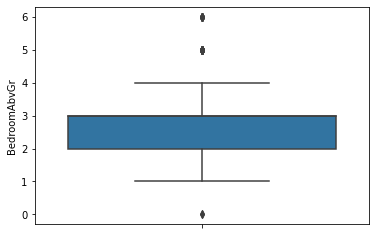

count    1459.000000
mean        2.854010
std         0.829788
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         6.000000
Name: BedroomAbvGr, dtype: float64
upperlimit: 4
lowerlimit: 1
outlier: count: 43 proportion: 0.029472241261137764 list: [6, 6, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 6, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 0, 5, 6, 5, 0, 5, 5, 5, 5, 5, 5, 6, 6, 5, 5]


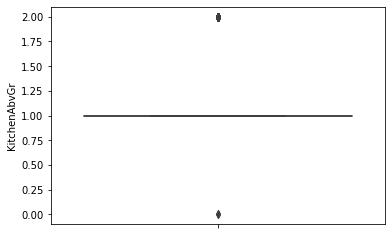

count    1459.000000
mean        1.042495
std         0.208472
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         2.000000
Name: KitchenAbvGr, dtype: float64
upperlimit: 1
lowerlimit: 1
outlier: count: 66 proportion: 0.045236463331048665 list: [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2]


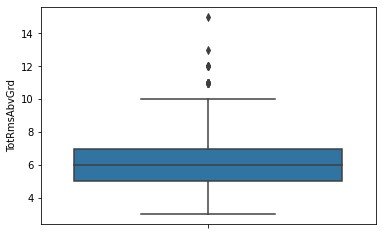

count    1459.000000
mean        6.385195
std         1.508895
min         3.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        15.000000
Name: TotRmsAbvGrd, dtype: float64
upperlimit: 10
lowerlimit: 3
outlier: count: 21 proportion: 0.01439342015078821 list: [12, 11, 12, 12, 11, 13, 11, 12, 11, 11, 11, 11, 11, 15, 12, 11, 11, 11, 11, 11, 11]


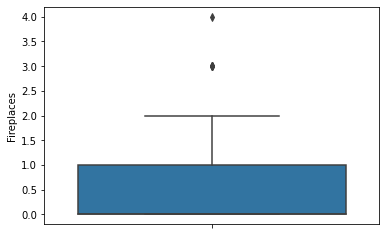

count    1459.00000
mean        0.58122
std         0.64742
min         0.00000
25%         0.00000
50%         0.00000
75%         1.00000
max         4.00000
Name: Fireplaces, dtype: float64
upperlimit: 2
lowerlimit: 0
outlier: count: 7 proportion: 0.004797806716929404 list: [3, 3, 3, 4, 3, 3, 3]


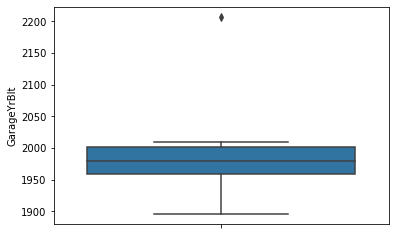

count    1381.000000
mean     1977.721217
std        26.431175
min      1895.000000
25%      1959.000000
50%      1979.000000
75%      2002.000000
max      2207.000000
Name: GarageYrBlt, dtype: float64
upperlimit: nan
lowerlimit: nan
outlier: count: 0 proportion: 0.0 list: []


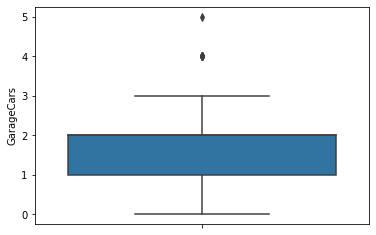

count    1458.000000
mean        1.766118
std         0.775945
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         5.000000
Name: GarageCars, dtype: float64
upperlimit: nan
lowerlimit: nan
outlier: count: 0 proportion: 0.0 list: []


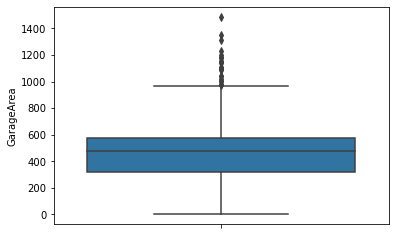

count    1458.000000
mean      472.768861
std       217.048611
min         0.000000
25%       318.000000
50%       480.000000
75%       576.000000
max      1488.000000
Name: GarageArea, dtype: float64
upperlimit: nan
lowerlimit: nan
outlier: count: 0 proportion: 0.0 list: []


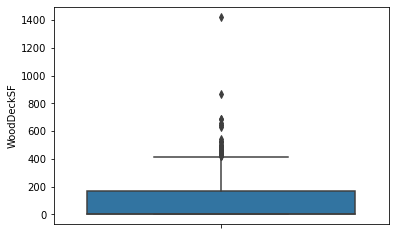

count    1459.000000
mean       93.174777
std       127.744882
min         0.000000
25%         0.000000
50%         0.000000
75%       168.000000
max      1424.000000
Name: WoodDeckSF, dtype: float64
upperlimit: 414
lowerlimit: 0
outlier: count: 35 proportion: 0.023989033584647018 list: [483, 657, 496, 450, 431, 462, 502, 501, 483, 467, 467, 490, 424, 424, 428, 460, 455, 460, 521, 646, 546, 483, 1424, 690, 421, 444, 870, 432, 641, 631, 520, 684, 453, 530, 474]


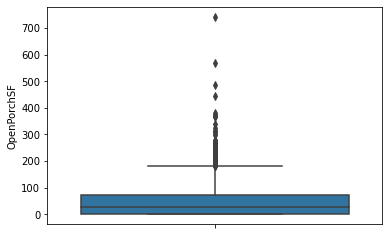

count    1459.000000
mean       48.313914
std        68.883364
min         0.000000
25%         0.000000
50%        28.000000
75%        72.000000
max       742.000000
Name: OpenPorchSF, dtype: float64
upperlimit: 180
lowerlimit: 0
outlier: count: 79 proportion: 0.05414667580534613 list: [192, 184, 224, 228, 278, 312, 192, 197, 273, 190, 235, 183, 226, 312, 254, 189, 204, 235, 188, 215, 222, 193, 240, 201, 238, 207, 182, 200, 251, 192, 230, 304, 240, 192, 299, 365, 195, 182, 216, 236, 372, 217, 192, 276, 265, 368, 228, 203, 228, 210, 256, 241, 192, 194, 324, 208, 211, 570, 195, 484, 742, 444, 266, 189, 246, 240, 265, 208, 191, 382, 266, 211, 240, 341, 253, 189, 245, 274, 225]


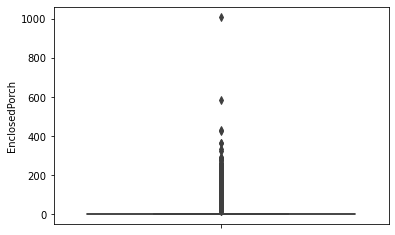

count    1459.000000
mean       24.243317
std        67.227765
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1012.000000
Name: EnclosedPorch, dtype: float64
upperlimit: 0
lowerlimit: 0
outlier: count: 251 proportion: 0.1720356408498972 list: [80, 186, 120, 150, 205, 113, 135, 126, 334, 246, 18, 60, 41, 128, 35, 48, 32, 128, 364, 112, 248, 168, 45, 239, 60, 52, 56, 168, 36, 86, 265, 56, 64, 280, 222, 209, 218, 84, 264, 260, 203, 120, 140, 100, 134, 128, 168, 432, 112, 156, 42, 64, 40, 169, 176, 148, 244, 128, 25, 81, 160, 176, 238, 94, 98, 51, 34, 105, 150, 213, 112, 102, 148, 105, 288, 24, 100, 90, 144, 211, 55, 180, 150, 57, 81, 78, 72, 368, 154, 144, 180, 218, 165, 92, 16, 192, 40, 66, 96, 100, 144, 248, 109, 236, 126, 96, 30, 120, 60, 139, 219, 144, 48, 101, 180, 80, 55, 180, 84, 80, 117, 204, 122, 190, 231, 70, 280, 239, 138, 183, 90, 121, 41, 207, 224, 116, 96, 160, 192, 192, 246, 140, 192, 249, 36, 84, 290, 160, 116, 175, 20, 26, 40,

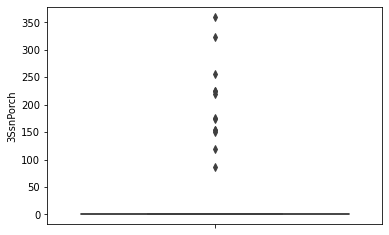

count    1459.000000
mean        1.794380
std        20.207842
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       360.000000
Name: 3SsnPorch, dtype: float64
upperlimit: 0
lowerlimit: 0
outlier: count: 13 proportion: 0.008910212474297465 list: [224, 255, 225, 360, 150, 153, 174, 153, 120, 219, 176, 86, 323]


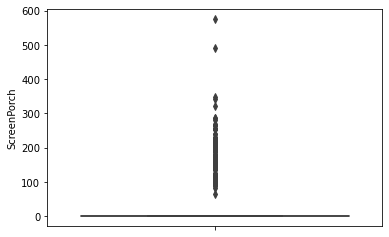

count    1459.000000
mean       17.064428
std        56.609763
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       576.000000
Name: ScreenPorch, dtype: float64
upperlimit: 0
lowerlimit: 0
outlier: count: 140 proportion: 0.09595613433858807 list: [120, 144, 256, 216, 204, 160, 240, 148, 168, 266, 160, 166, 200, 155, 108, 200, 490, 168, 168, 156, 196, 121, 92, 288, 342, 255, 111, 112, 216, 231, 182, 160, 140, 110, 92, 168, 117, 195, 195, 115, 120, 120, 144, 141, 208, 192, 216, 144, 196, 94, 216, 192, 200, 164, 95, 256, 64, 576, 216, 255, 227, 161, 192, 100, 221, 100, 155, 171, 135, 322, 174, 175, 144, 182, 180, 144, 217, 200, 256, 161, 201, 192, 175, 168, 109, 156, 165, 225, 150, 216, 84, 126, 168, 144, 144, 116, 100, 153, 228, 144, 153, 145, 138, 108, 240, 88, 280, 115, 144, 123, 225, 156, 210, 224, 110, 264, 270, 120, 142, 288, 195, 112, 144, 227, 162, 115, 225, 210, 180, 200, 180, 348, 168, 112, 113, 104, 192, 153, 155, 138]


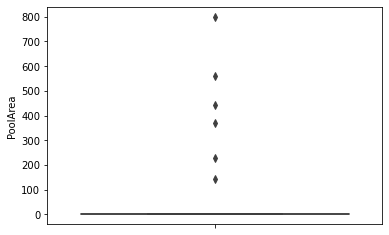

count    1459.000000
mean        1.744345
std        30.491646
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       800.000000
Name: PoolArea, dtype: float64
upperlimit: 0
lowerlimit: 0
outlier: count: 6 proportion: 0.00411240575736806 list: [144, 368, 444, 228, 561, 800]


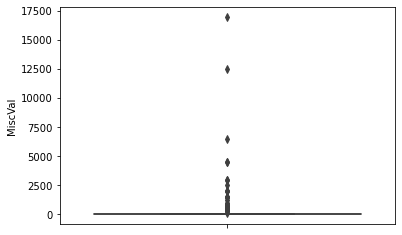

count     1459.000000
mean        58.167923
std        630.806978
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      17000.000000
Name: MiscVal, dtype: float64
upperlimit: 0
lowerlimit: 0
outlier: count: 51 proportion: 0.03495544893762851 list: [12500, 500, 1500, 300, 450, 500, 80, 600, 490, 1200, 650, 450, 400, 600, 900, 1500, 2500, 700, 750, 2000, 400, 650, 450, 1500, 450, 6500, 400, 1000, 600, 4500, 3000, 400, 500, 2000, 400, 2000, 400, 500, 450, 17000, 1512, 3000, 455, 460, 650, 400, 4500, 600, 500, 420, 700]


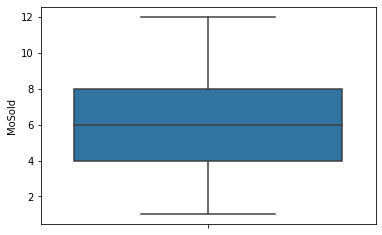

count    1459.000000
mean        6.104181
std         2.722432
min         1.000000
25%         4.000000
50%         6.000000
75%         8.000000
max        12.000000
Name: MoSold, dtype: float64
upperlimit: 12
lowerlimit: 1
outlier: count: 0 proportion: 0.0 list: []


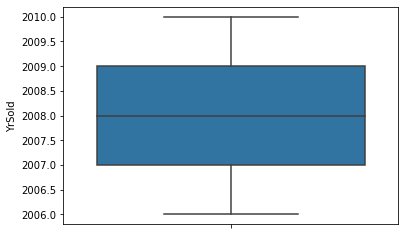

count    1459.000000
mean     2007.769705
std         1.301740
min      2006.000000
25%      2007.000000
50%      2008.000000
75%      2009.000000
max      2010.000000
Name: YrSold, dtype: float64
upperlimit: 2010
lowerlimit: 2006
outlier: count: 0 proportion: 0.0 list: []


In [103]:
#Check The Outliers
for x in df_backtesting2_num.columns:
    # boxplot
    sns.boxplot(y=df_backtesting2_num[x])
    plt.show()
   
    
    # statistic metrics
    print(df_backtesting2_num[x].describe())
    q1 = np.percentile(df_backtesting2_num[x], 25)
    q3 = np.percentile(df_backtesting2_num[x], 75)
    iqr = q3-q1
    upperbound = q3+1.5*iqr
    lowerbound = q1-1.5*iqr
    upperlimit = np.max(df_backtesting2_num[x][df_backtesting2_num[x]<=upperbound])
    lowerlimit = np.min(df_backtesting2_num[x][df_backtesting2_num[x]>=lowerbound])
    print('upperlimit: {}'.format(upperlimit))
    print('lowerlimit: {}'.format(lowerlimit))
    outlier = df_backtesting2_num[x][(df_backtesting2_num[x]>upperbound) | (df_backtesting2_num[x]<lowerbound)]
    print('outlier: count: {} proportion: {} list: {}'.format(len(outlier), len(outlier)/len(df_backtesting2_num[x]), list(outlier)))

In [104]:
#Handling Outliers
Q1 = df_train2_num.quantile(0.25)
Q3 = df_train2_num.quantile(0.75)
IQR = Q3 - Q1
maximum = Q3 + (1.5*IQR)
print('Nilai Maximum dari masing-masing Variable adalah: ')
print(maximum)
minimum = Q1 - (1.5*IQR)
print('\nNilai Minimum dari masing-masing Variable adalah: ')
print(minimum)
more_than = (df_train2_num > maximum)
lower_than = (df_train2_num < minimum)
df_train_num = df_train2_num.mask(more_than, maximum, axis=1)
df_train_num = df_train2_num.mask(lower_than, minimum, axis=1)
print('\nPersebaran data setelah ditangani Outlier: ')
print(df_train2_num.describe())

Nilai Maximum dari masing-masing Variable adalah: 
Id                2189.500000
MSSubClass         145.000000
LotFrontage        111.500000
LotArea          17673.500000
OverallQual         10.000000
OverallCond          7.500000
YearBuilt         2069.000000
YearRemodAdd      2059.500000
MasVnrArea         415.000000
BsmtFinSF1        1780.625000
BsmtFinSF2           0.000000
BsmtUnfSF         1685.500000
TotalBsmtSF       2052.000000
1stFlrSF          2155.125000
2ndFlrSF          1820.000000
LowQualFinSF         0.000000
GrLivArea         2747.625000
BsmtFullBath         2.500000
BsmtHalfBath         0.000000
FullBath             3.500000
HalfBath             2.500000
BedroomAbvGr         4.500000
KitchenAbvGr         1.000000
TotRmsAbvGrd        10.000000
Fireplaces           2.500000
GarageYrBlt       2063.500000
GarageCars           3.500000
GarageArea         938.250000
WoodDeckSF         420.000000
OpenPorchSF        170.000000
EnclosedPorch        0.000000
3SsnPorch          

In [105]:
#Handling Outliers
Q1 = df_backtesting2_num.quantile(0.25)
Q3 = df_backtesting2_num.quantile(0.75)
IQR = Q3 - Q1
maximum = Q3 + (1.5*IQR)
print('Nilai Maximum dari masing-masing Variable adalah: ')
print(maximum)
minimum = Q1 - (1.5*IQR)
print('\nNilai Minimum dari masing-masing Variable adalah: ')
print(minimum)
more_than = (df_backtesting2_num > maximum)
lower_than = (df_backtesting2_num < minimum)
df_train_num = df_backtesting2_num.mask(more_than, maximum, axis=1)
df_train_num = df_backtesting2_num.mask(lower_than, minimum, axis=1)
print('\nPersebaran data setelah ditangani Outlier: ')
print(df_backtesting2_num.describe())

Nilai Maximum dari masing-masing Variable adalah: 
Id                3648.00
MSSubClass         145.00
LotFrontage        113.00
LotArea          17707.25
OverallQual         10.00
OverallCond          7.50
YearBuilt         2073.00
YearRemodAdd      2065.50
MasVnrArea         410.00
BsmtFinSF1        1883.75
BsmtFinSF2           0.00
BsmtUnfSF         1665.50
TotalBsmtSF       2086.50
1stFlrSF          2146.00
2ndFlrSF          1690.00
LowQualFinSF         0.00
GrLivArea         2626.25
BsmtFullBath         2.50
BsmtHalfBath         0.00
FullBath             3.50
HalfBath             2.50
BedroomAbvGr         4.50
KitchenAbvGr         1.00
TotRmsAbvGrd        10.00
Fireplaces           2.50
GarageYrBlt       2066.50
GarageCars           3.50
GarageArea         963.00
WoodDeckSF         420.00
OpenPorchSF        180.00
EnclosedPorch        0.00
3SsnPorch            0.00
ScreenPorch          0.00
PoolArea             0.00
MiscVal              0.00
MoSold              14.00
YrSold       

In [106]:
#I found some columns which had no missing values in "Train Data but had missing values in "Test Data", 
#so to make things easier, I combined these two datasets.
ntrain = df_train2.shape[0]
ntest = df_backtesting2.shape[0]
y_train = df_train2.SalePrice.values
merge_datasets = pd.concat((df_train2, df_backtesting2)).reset_index(drop=True)
merge_datasets.drop(['SalePrice'], axis=1, inplace=True)

In [107]:
#Check the missing values
missing=pd.DataFrame(merge_datasets.isna().sum())
missing['Jumlah Missing Value']=missing
missing = missing.drop([0], axis=1)
percent = pd.DataFrame(merge_datasets.isnull().sum() * 100 / len(merge_datasets))
percent['Persentase Missing Value']=percent
percent = percent.drop([0], axis=1)
percentmissing=pd.concat([missing, percent], axis=1)
percentmissing.transpose()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Jumlah Missing Value,0.0,0.0,4.000000,486.000000,0.0,0.0,2721.000000,0.0,0.0,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,24.000000,23.000000,0.0,0.0,0.0,81.000000,82.000000,82.000000,79.000000,1.000000,80.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,2.000000,2.000000,0.0,0.0,0.0,0.0,1.000000,0.0,2.000000,0.0,1420.000000,157.000000,159.000000,159.000000,1.000000,1.000000,159.000000,159.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2909.000000,2348.000000,2814.000000,0.0,0.0,0.0,1.000000,0.0
Persentase Missing Value,0.0,0.0,0.137033,16.649538,0.0,0.0,93.216855,0.0,0.0,0.068517,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.034258,0.034258,0.822199,0.787941,0.0,0.0,0.0,2.774923,2.809181,2.809181,2.706406,0.034258,2.740665,0.034258,0.034258,0.034258,0.0,0.0,0.0,0.034258,0.0,0.0,0.0,0.0,0.068517,0.068517,0.0,0.0,0.0,0.0,0.034258,0.0,0.068517,0.0,48.646797,5.378554,5.447071,5.447071,0.034258,0.034258,5.447071,5.447071,0.0,0.0,0.0,0.0,0.0,0.0,0.0,99.657417,80.438506,96.402878,0.0,0.0,0.0,0.034258,0.0


- I will deal with missing values by looking at the values of each column and understanding them

In [108]:
#the value of 'nan' here means that the house does not have access to an alley, 
#because the house is on the side of the road
merge_datasets["Alley"] = merge_datasets["Alley"].fillna("None")

In [109]:
#the value of 'nan' here means the house have no masonry's veneer
merge_datasets["MasVnrType"] = merge_datasets["MasVnrType"].fillna("None")

In [110]:
#the value of 'nan' here means the house have no basement
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    merge_datasets[col] = merge_datasets[col].fillna('None')

In [111]:
#the value of 'nan' here because that house no have a fireplace
merge_datasets["FireplaceQu"] = merge_datasets["FireplaceQu"].fillna("None")

In [112]:
#the value of 'nan' here means the house have no garage
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    merge_datasets[col] = merge_datasets[col].fillna('None')

In [113]:
#the value of 'nan' here means the house have no pool
merge_datasets["PoolQC"] = merge_datasets["PoolQC"].fillna("None")

In [114]:
#the value of 'nan' here because there no masonry's veneer, so i will fill with "0"
merge_datasets["MasVnrArea"] = merge_datasets["MasVnrArea"].fillna(0)

In [115]:
#the value of 'nan' here means the house have no fence
merge_datasets["Fence"] = merge_datasets["Fence"].fillna("None")

In [116]:
#the value of 'nan' here because there no basement, so i will fill with "0"
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    merge_datasets[col] = merge_datasets[col].fillna(0)

In [117]:
#the value of 'nan' here because the house have no garage, so i will fill with "0"
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    merge_datasets[col] = merge_datasets[col].fillna(0)

In [118]:
#the value of 'nan' here means there no Miscellaneous feature not covered in other categories
merge_datasets["MiscFeature"] = merge_datasets["MiscFeature"].fillna("None")

In [119]:
merge_datasets['MSSubClass'] = merge_datasets['MSSubClass'].fillna("None")

In [120]:
#Because the data description instruct to assume typical, so i will fill with that
merge_datasets["Functional"] = merge_datasets["Functional"].fillna("Typ")

In [121]:
merge_datasets['Electrical'] = merge_datasets['Electrical'].fillna(merge_datasets['Electrical'].mode()[0])

In [122]:
merge_datasets['LotFrontage'] = merge_datasets['LotFrontage'].fillna(merge_datasets['LotFrontage'].mode()[0])

In [123]:
merge_datasets['MSZoning'] = merge_datasets['MSZoning'].fillna(merge_datasets['MSZoning'].mode()[0])

In [124]:
merge_datasets['KitchenQual'] = merge_datasets['KitchenQual'].fillna(merge_datasets['KitchenQual'].mode()[0])

In [125]:
merge_datasets['Exterior1st'] = merge_datasets['Exterior1st'].fillna(merge_datasets['Exterior1st'].mode()[0])

In [126]:
merge_datasets['Exterior2nd'] = merge_datasets['Exterior2nd'].fillna(merge_datasets['Exterior2nd'].mode()[0])

In [127]:
merge_datasets['SaleType'] = merge_datasets['SaleType'].fillna(merge_datasets['SaleType'].mode()[0])

In [128]:
#Because the column only have one value, so i will drop the column
merge_datasets = merge_datasets.drop(['Utilities'], axis=1)

In [129]:
merge_datasets.isna().sum().sum()

0

# 4. Feature Engineering

### A. Feature Transformation

In [130]:
merge_datasets['ExterQual']=merge_datasets.ExterQual.map({'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
merge_datasets['ExterCond']=merge_datasets.ExterCond.map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
merge_datasets['BsmtQual']=merge_datasets.BsmtQual.map({'None':0 , 'Po':1, 'Fa':2, 'TA':3, 'Gd':4})
merge_datasets['BsmtCond']=merge_datasets.BsmtCond.map({'None':0 , 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
merge_datasets['BsmtExposure']=merge_datasets.BsmtExposure.map({'None':0 , 'No':1, 'Mn':2, 'Av':3, 'Gd':4})
merge_datasets['BsmtFinType1']=merge_datasets.BsmtFinType1.map({'None':0 , 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6})
merge_datasets['BsmtFinType2']=merge_datasets.BsmtFinType2.map({'None':0 , 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6})
merge_datasets['HeatingQC']=merge_datasets.HeatingQC.map({'Po':1 , 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
merge_datasets['CentralAir']=merge_datasets.CentralAir.map({'N':0 , 'Y':1})
merge_datasets['KitchenQual']=merge_datasets.KitchenQual.map({'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
merge_datasets['FireplaceQu']=merge_datasets.FireplaceQu.map({'None':0 , 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
merge_datasets['GarageQual']=merge_datasets.GarageQual.map({'None':0 , 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
merge_datasets['GarageCond']=merge_datasets.GarageCond.map({'None':0 , 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
merge_datasets['PoolQC']=merge_datasets.PoolQC.map({'None':0 , 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
merge_datasets['Fence']=merge_datasets.Fence.map({'None':0 , 'MnWw':1, 'GdWo':2, 'MnPrv':3, 'GdPrv':4})

In [131]:
merge_datasets.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
2914,2915,160,RM,21.0,1936,Pave,None,Reg,Lvl,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,3,3,CBlock,3.0,3.0,1,1,0.0,1,0.0,546.0,546.0,GasA,4,1,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,3,5,Typ,0,0,None,0.0,None,0.0,0.0,0,0,Y,0,0,0,0,0,0,0,0,None,0,6,2006,WD,Normal
2915,2916,160,RM,21.0,1894,Pave,None,Reg,Lvl,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,3,3,CBlock,3.0,3.0,1,3,252.0,1,0.0,294.0,546.0,GasA,3,1,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,3,6,Typ,0,0,CarPort,1970.0,Unf,1.0,286.0,3,3,Y,0,24,0,0,0,0,0,0,None,0,4,2006,WD,Abnorml
2916,2917,20,RL,160.0,20000,Pave,None,Reg,Lvl,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,3,CBlock,3.0,3.0,1,5,1224.0,1,0.0,0.0,1224.0,GasA,5,1,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,3,7,Typ,1,3,Detchd,1960.0,Unf,2.0,576.0,3,3,Y,474,0,0,0,0,0,0,0,None,0,9,2006,WD,Abnorml
2917,2918,85,RL,62.0,10441,Pave,None,Reg,Lvl,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,0.0,3,3,PConc,4.0,3.0,3,6,337.0,1,0.0,575.0,912.0,GasA,3,1,SBrkr,970,0,0,970,0.0,1.0,1,0,3,1,3,6,Typ,0,0,None,0.0,None,0.0,0.0,0,0,Y,80,32,0,0,0,0,0,3,Shed,700,7,2006,WD,Normal
2918,2919,60,RL,74.0,9627,Pave,None,Reg,Lvl,Inside,Mod,Mitchel,Norm,Norm,1Fam,2Story,7,5,1993,1994,Gable,CompShg,HdBoard,HdBoard,BrkFace,94.0,3,3,PConc,4.0,3.0,3,2,758.0,1,0.0,238.0,996.0,GasA,5,1,SBrkr,996,1004,0,2000,0.0,0.0,2,1,3,1,3,9,Typ,1,3,Attchd,1993.0,Fin,3.0,650.0,3,3,Y,190,48,0,0,0,0,0,0,None,0,11,2006,WD,Normal


In [132]:
merge_datasets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2919 non-null   object 
 3   LotFrontage    2919 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          2919 non-null   object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

In [133]:
#Transforming some numerical variables that are really categorical
merge_datasets['MSSubClass'] = merge_datasets['MSSubClass'].apply(str)
merge_datasets['MoSold'] = merge_datasets['MoSold'].astype(str)
merge_datasets['YrSold'] = merge_datasets['MoSold'].astype(str)

In [134]:
merge_datasets_num = merge_datasets.select_dtypes(include = 'number')
merge_datasets_obj = merge_datasets.select_dtypes(include = 'object')

In [135]:
merge_datasets_obj.columns

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'Electrical',
       'Functional', 'GarageType', 'GarageFinish', 'PavedDrive', 'MiscFeature',
       'MoSold', 'YrSold', 'SaleType', 'SaleCondition'],
      dtype='object')

In [136]:
merge_datasets_num.columns

Index(['Id', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC',
       'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscVal'],
      dtype='object')

In [137]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(merge_datasets_num)

MinMaxScaler()

In [138]:
merge_datasets_num_scaler = pd.DataFrame(scaler.transform(merge_datasets_num))
merge_datasets_num_scaler.columns = merge_datasets_num.columns
merge_datasets_num_scaler

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal
0,0.000000,0.150685,0.033420,0.666667,0.500,0.949275,0.883333,0.12250,0.666667,0.5,1.00,0.75,0.25,1.000000,0.125089,0.166667,0.0,0.064212,0.140098,1.00,1.0,0.109641,0.413559,0.0,0.259231,0.333333,0.0,0.50,0.5,0.375,0.333333,0.666667,0.461538,0.00,0.0,0.907567,0.4,0.368280,0.6,0.6,0.000000,0.082210,0.000000,0.0,0.0,0.0,0.0,0.00,0.000000
1,0.000343,0.202055,0.038795,0.555556,0.875,0.753623,0.433333,0.00000,0.333333,0.5,1.00,0.75,1.00,0.833333,0.173281,0.166667,0.0,0.121575,0.206547,1.00,1.0,0.194917,0.000000,0.0,0.174830,0.000000,0.5,0.50,0.0,0.375,0.333333,0.333333,0.307692,0.25,0.6,0.895333,0.4,0.309140,0.6,0.6,0.209270,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00,0.000000
2,0.000685,0.160959,0.046507,0.666667,0.500,0.934783,0.866667,0.10125,0.666667,0.5,1.00,0.75,0.50,1.000000,0.086109,0.166667,0.0,0.185788,0.150573,1.00,1.0,0.123083,0.419370,0.0,0.273549,0.333333,0.0,0.50,0.5,0.375,0.333333,0.666667,0.307692,0.25,0.6,0.906661,0.4,0.408602,0.6,0.6,0.000000,0.056604,0.000000,0.0,0.0,0.0,0.0,0.00,0.000000
3,0.001028,0.133562,0.038561,0.666667,0.500,0.311594,0.333333,0.00000,0.333333,0.5,0.75,1.00,0.25,0.833333,0.038271,0.166667,0.0,0.231164,0.123732,0.75,1.0,0.131695,0.366102,0.0,0.260550,0.333333,0.0,0.25,0.0,0.375,0.333333,0.666667,0.384615,0.25,0.8,0.905301,0.6,0.431452,0.6,0.6,0.000000,0.047170,0.268775,0.0,0.0,0.0,0.0,0.00,0.000000
4,0.001371,0.215753,0.060576,0.777778,0.500,0.927536,0.833333,0.21875,0.666667,0.5,1.00,0.75,0.75,1.000000,0.116052,0.166667,0.0,0.209760,0.187398,1.00,1.0,0.170342,0.509927,0.0,0.351168,0.333333,0.0,0.50,0.5,0.500,0.333333,0.666667,0.538462,0.25,0.6,0.906208,0.6,0.561828,0.6,0.6,0.134831,0.113208,0.000000,0.0,0.0,0.0,0.0,0.00,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,0.998629,0.000000,0.002973,0.333333,0.750,0.710145,0.333333,0.00000,0.333333,0.5,0.75,0.75,0.25,0.166667,0.000000,0.166667,0.0,0.233733,0.089362,0.75,1.0,0.044528,0.264407,0.0,0.142803,0.000000,0.0,0.25,0.5,0.375,0.333333,0.333333,0.230769,0.00,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00,0.000000
2915,0.998972,0.000000,0.002776,0.333333,0.500,0.710145,0.333333,0.00000,0.333333,0.5,0.75,0.75,0.25,0.500000,0.044649,0.166667,0.0,0.125856,0.089362,0.50,1.0,0.044528,0.264407,0.0,0.142803,0.000000,0.0,0.25,0.5,0.375,0.333333,0.333333,0.307692,0.00,0.0,0.892614,0.2,0.192204,0.6,0.6,0.000000,0.032345,0.000000,0.0,0.0,0.0,0.0,0.00,0.000000
2916,0.999315,0.476027,0.087406,0.444444,0.750,0.637681,0.766667,0.00000,0.333333,0.5,0.75,0.75,0.25,0.833333,0.216867,0.166667,0.0,0.000000,0.200327,1.00,1.0,0.186936,0.000000,0.0,0.167671,0.333333,0.0,0.25,0.0,0.500,0.333333,0.333333,0.384615,0.25,0.6,0.888083,0.4,0.387097,0.6,0.6,0.332865,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00,0.000000
2917,0.999657,0.140411,0.042726,0.444444,0.500,0.869565,0.700000,0.00000,0.333333,0.5,1.00,0.75,0.75,1.000000,0.059709,0.166667,0.0,0.246147,0.149264,0.50,1.0,0.133585,0.000000,0.0,0.119819,0.000000,0.5,0.25,0.0,0.375,0.333333,0.333333,0.307692,0.00,0.0,0.000000,0.0,0.000000,0.0,0.0,0.056180,0.043127,0.000000,0.0,0.0,0.0,0.0,0.75,0.041176


In [139]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(merge_datasets_obj)

OneHotEncoder(handle_unknown='ignore')

In [140]:
merge_datasets_obj_ohe = pd.DataFrame(ohe.transform(merge_datasets_obj).toarray())
merge_datasets_obj_ohe.columns = ohe.get_feature_names(merge_datasets_obj.columns)
merge_datasets_obj_ohe

,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_None,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_Fin,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_N,PavedDrive_P,PavedDrive_Y,MiscFeature_Gar2,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MoSold_1,MoSold_10,MoSold_11,MoSold_12,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,YrSold_1,YrSold_10,YrSold_11,YrSold_12,YrSold_2,YrSold_3,YrSold_4,YrSold_5,YrSold_6,YrSold_7,YrSold_8,YrSold_9,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.

In [141]:
merge_transformed = pd.concat([merge_datasets_num_scaler, merge_datasets_obj_ohe], axis=1)

In [142]:
merge_transformed.head()

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_None,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_Fin,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_N,PavedDrive_P,PavedDrive_Y,MiscFeature_Gar2,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MoSold_1,MoSold_10,MoSold_11,MoSold_12,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,YrSold_1,YrSold_10,YrSold_11,YrSold_12,YrSold_2,YrSold_3,YrSold_4,YrSold_5,YrSold_6,YrSold_7,YrSold_8,YrSold_9,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_

In [143]:
merge_transformed = merge_transformed.drop(['Id'], axis=1)

In [144]:
numeric_feats = merge_transformed.dtypes[merge_transformed.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = merge_transformed[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)



Skew in numerical features: 



,Skew
MSSubClass_150,54.000003
RoofMatl_Membran,54.000003
Exterior1st_ImStucc,54.000003
Condition2_RRAn,54.000003
MiscFeature_TenC,54.000003
RoofMatl_Metal,54.000003
RoofMatl_Roll,54.000003
RoofMatl_ClyTile,54.000003
Condition2_RRAe,54.000003
Heating_Floor,54.000003


In [145]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    merge_transformed[feat] = boxcox1p(merge_transformed[feat], lam)
    
#all_data[skewed_features] = np.log1p(all_data[skewed_features])

There are 276 skewed numerical features to Box Cox transform


In [175]:
train = merge_transformed[:ntrain]
test = merge_transformed[ntrain:]

In [176]:
train.shape

(1460, 276)

In [177]:
test.shape

(1459, 276)

In [178]:
y_train.shape

(1460,)

# 5. Modelling

In [205]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb



In [206]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [207]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [208]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)



In [209]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [210]:
score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11

In [211]:
score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11

# 6. Evaluation

In [212]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [213]:
model_xgb.fit(train, y_train)
xgb_train_pred = model_xgb.predict(train)
xgb_pred = np.expm1(model_xgb.predict(test))
print(rmsle(y_train, xgb_train_pred))

[14:34:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


0.08054820732901936


In [214]:
model_lgb.fit(train, y_train)
lgb_train_pred = model_lgb.predict(train)
lgb_pred = np.expm1(model_lgb.predict(test.values))
print(rmsle(y_train, lgb_train_pred))

[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
0.07690021123933606


In [218]:
sub = pd.DataFrame()
sub['Id'] = Id
sub['SalePrice'] = lgb_pred
sub.to_csv('housepricepredictionlgb_ryan.csv',index=False)